In [1]:
#User provided input
path = "/Users/chrisgraves/Documents/Yeast_data/Microscopy_data/" #Path of data
expt_ID = c('CG_140909_2_GR','CG_140910_2_GR')#Experiment ID for analysis
max_t = 20 #Maximum number of time points recorded in all experiments
library(segmented,lib.loc = "/Library/Frameworks/R.framework/Versions/3.2/Resources/library/")
library(ggplot2)
library(reshape2)
library(plyr)

In [2]:
#Load data from disk
for (j in 1:length(expt_ID)) {
  
  load(paste(path,expt_ID[j],"/d.Rfile",sep=""))
  load(paste(path,expt_ID[j],"/gr.Rfile",sep=""))
  load(paste(path,expt_ID[j],"/md.Rfile",sep=""))

    #Create data frame containing raw microcolony growth data
        #Microcolony areas
        areas = as.data.frame(cbind(d$areas,matrix(data=NA,nrow = dim(d$areas)[1],ncol = max_t-dim(d$areas)[2])))
        
    
        #NYU computed parameters
        dist = md$mindist #distance to the nearest microcolony
        growth = gr$colparam #growth rate calculations
        old_coords = cbind(md$cxm,md$cym)
        cenfield = md$cenfield
        


        #Experiment date
        date = unlist(strsplit(expt_ID[j],""))[4:9]
        date = paste(date[1],date[2],date[3],date[4],date[5],date[6],sep="")
        date = matrix(data = date,nrow=length(dist),ncol=1)
        
        #Extract strain IDs
        condition.variable.names<-c("Treatment",'Strain')
        number.condition.variables<-length(condition.variable.names)
  
        wells<-vector()
          for(i in 1:length(d$well.list)){
            colonies<-as.vector(unlist(d$well.list[i]))
            wells[colonies]<-names(d$well.list[i])
        }
        
        conditions<-as.vector(d$condition.names[wells])
        conditionsMat<-matrix(NA,length(conditions),number.condition.variables)
  
        if(number.condition.variables==1){
            for(i in 1:length(conditions)){
              conditionsMat[i,]<-conditions[i]
                }
          }
        else{
            for(i in 1:length(conditions)){
          spltCond<-strsplit(conditions[i], "-", fixed=T)
          spltCondVector<-unlist(spltCond)
          conditionsMat[i,]<-spltCondVector
            }
          }
  
      colnames(conditionsMat)<-condition.variable.names
  
      if (j==1) {
        df = cbind(as.data.frame(conditionsMat),growth,as.data.frame(date),dist,cenfield,old_coords,areas)
        colnames(df) = c("treatment","strain",'rate',"r",'foldx',"lag","rate_first","rate_last","date","dist",'cenfield','x','y',as.character(0:(max_t-1)))
            head}
    else{
      temp = cbind(as.data.frame(conditionsMat),growth,as.data.frame(date),dist,cenfield,old_coords,areas)
      colnames(temp) = c("treatment","strain",'rate',"r",'foldx',"lag","rate_first","rate_last","date","dist",'cenfield','x','y',as.character(0:(max_t-1)))
      df = rbind(df,temp)
   
        }
}

head(df)
max(df$rate_last,na.rm=T)
    

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,CH,5,0.4098149,0.940394,193.0244,6.584779,1,20,140909,828.6925,1,742.2074,341.7439,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742
2,CH,5,NA,NA,2.307692,NA,1,20,140909,NA,0,NA,NA,43,35,26,31,33,29,32,44,45,50,56,56,50,60,59,44,57,46,52,53
3,CH,5,NA,NA,NA,NA,NA,NA,140909,NA,0,NA,NA,437,320,291,288,312,337,315,375,415,355,366,339,353,354,312,310,338,325,414,310
4,CH,5,NA,NA,2.216216,NA,1,20,140909,NA,0,NA,NA,246,228,228,142,129,131,130,138,136,125,128,127,129,123,124,126,125,117,111,113
5,CH,5,NA,NA,NA,NA,NA,NA,140909,NA,0,NA,NA,302,280,278,269,266,268,261,275,285,260,281,268,268,268,264,256,258,251,245,239
6,CH,5,NA,NA,NA,NA,NA,NA,140909,NA,0,NA,NA,172,156,153,154,142,149,145,157,161,153,163,159,157,155,157,159,155,155,151,144


[1] 20

[1] 341891     33

[1] 242783     34

[1] 234048     34

[1] 33836    34

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,new_foldx
1,CH,5,0.4098149,0.940394,193.0244,6.584779,1,20,140909,828.6925,1,742.2074,341.7439,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742,193.0244
15,CH,5,0.4602265,0.9986975,101.3077,5.047883,1,16,140909,828.6925,0,1515.474,639.7197,327,293,286,301,335,393,546,836,1193,1967,3285,5052,8362,12998,19218,28974,0,0,0,0,101.3077
29,CH,5,0.4927077,0.9958329,32.95,5.074305,1,13,140909,1013.204,0,2515.125,804.8921,108,102,104,101,100,118,147,276,456,777,1165,2071,3295,0,0,0,0,0,0,0,32.95
33,CH,5,0.508284,0.9831733,35.52174,2.239006,1,10,140909,877.9347,0,816.2294,51.00131,150,138,161,232,331,480,831,2006,3019,4902,0,0,0,0,0,0,0,0,0,0,35.52174
36,CH,5,0.4113621,0.9790572,54.0696,8.744158,1,20,140909,1161.928,0,850.696,1790.549,474,399,402,325,315,273,288,321,366,452,913,983,2012,3368,3845,5699,7057,8524,11465,14761,54.0696
47,CH,5,0.4385406,0.9974115,371.1858,4.196736,1,20,140909,877.9347,0,1663.269,281.8557,122,115,117,113,120,166,272,385,619,1080,1574,2403,3266,4674,6818,10245,15091,21806,29372,41944,371.1858


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,index
207188,0,79,73,83,86,115,195,350,521,752,1279,2230,3382,5446,9034,13852,0,0,0,0,25639
119670,98,121,191,297,509,693,1289,1916,2906,4987,7062,9679,0,0,0,0,0,0,0,0,14995
318079,100,90,144,200,289,483,766,1274,2463,3728,5263,8887,13477,18532,0,0,0,0,0,0,31963
55719,140,119,196,242,389,597,1086,1660,2895,4128,5884,0,0,0,0,0,0,0,0,0,8776
270191,195,155,141,154,200,285,439,617,967,1462,2324,4378,6287,9170,13534,0,0,0,0,0,29110
200261,217,219,209,189,205,205,209,302,364,424,646,1054,2154,2995,5320,0,0,0,0,0,25069


,index,time,area
1,25639,0,0
2,14995,0,98
3,31963,0,100
4,8776,0,140
5,29110,0,195
6,25069,0,217


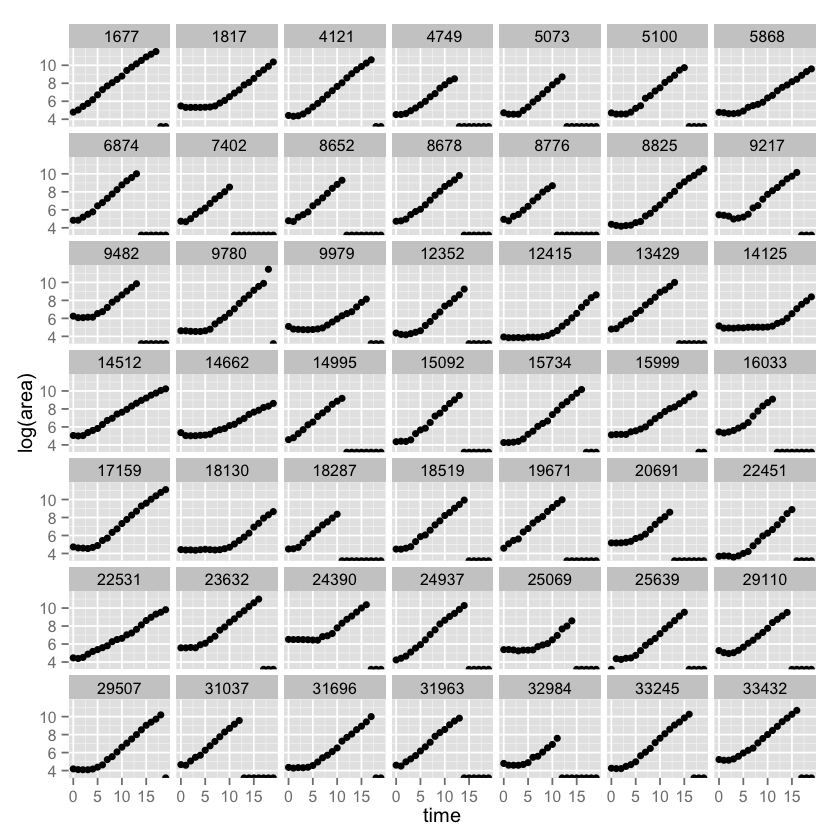

In [3]:
#Extract data from heat shocked colonies
dim(df)
hs = subset(df,df$treatment=='HH'|df$treatment=='CH'|df$treatment=='PH')
areas = hs[,(dim(hs)[2]-19):dim(hs)[2]]
areas[,which(is.na(colSums(areas)))] = 0
hs[(dim(hs)[2]-19):dim(hs)[2]] = areas
hs$new_foldx = apply(areas, 1, function(x) {max(x,na.rm=T)/min(x[x!=0])})
dim(hs)


#Remove observations without sufficient number of measurements
hs = subset(hs,rowSums(areas!=0)>=10) #require at least 10 measurements
dim(hs)

#Remove observations with no detectable growth
hs = subset(hs,hs$new_foldx>20)
dim(hs)
head(hs)

#Select random rows and plot growth curves 
num_obs = 49
rand_rows = sample(1:dim(hs)[1],num_obs)
rand_hs = hs[rand_rows,(dim(hs)[2]-max_t):(dim(hs)[2]-1)]

rand_hs$index = rand_rows
head(rand_hs)
rand_melt = melt(rand_hs,id = "index",value.name="area")
colnames(rand_melt) = c("index","time","area")
rand_melt$time = as.numeric(rand_melt$time)-1
head(rand_melt)

growth_plots = ggplot(rand_melt,aes(x = time,y=log(area)))+
    geom_point()+
    facet_wrap(~index)

growth_plots


In [5]:
head(hs)
dim(hs)
dim(subset(hs,hs$date==140909))

,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,new_foldx
1,CH,5,0.4098149,0.940394,193.0244,6.584779,1,20,140909,828.6925,1,742.2074,341.7439,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742,193.0244
15,CH,5,0.4602265,0.9986975,101.3077,5.047883,1,16,140909,828.6925,0,1515.474,639.7197,327,293,286,301,335,393,546,836,1193,1967,3285,5052,8362,12998,19218,28974,0,0,0,0,101.3077
29,CH,5,0.4927077,0.9958329,32.95,5.074305,1,13,140909,1013.204,0,2515.125,804.8921,108,102,104,101,100,118,147,276,456,777,1165,2071,3295,0,0,0,0,0,0,0,32.95
33,CH,5,0.508284,0.9831733,35.52174,2.239006,1,10,140909,877.9347,0,816.2294,51.00131,150,138,161,232,331,480,831,2006,3019,4902,0,0,0,0,0,0,0,0,0,0,35.52174
36,CH,5,0.4113621,0.9790572,54.0696,8.744158,1,20,140909,1161.928,0,850.696,1790.549,474,399,402,325,315,273,288,321,366,452,913,983,2012,3368,3845,5699,7057,8524,11465,14761,54.0696
47,CH,5,0.4385406,0.9974115,371.1858,4.196736,1,20,140909,877.9347,0,1663.269,281.8557,122,115,117,113,120,166,272,385,619,1080,1574,2403,3266,4674,6818,10245,15091,21806,29372,41944,371.1858


[1] 33836    34

[1] 25312    34

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,index
207188,0,79,73,83,86,115,195,350,521,752,1279,2230,3382,5446,9034,13852,0,0,0,0,25639
119670,98,121,191,297,509,693,1289,1916,2906,4987,7062,9679,0,0,0,0,0,0,0,0,14995
318079,100,90,144,200,289,483,766,1274,2463,3728,5263,8887,13477,18532,0,0,0,0,0,0,31963
55719,140,119,196,242,389,597,1086,1660,2895,4128,5884,0,0,0,0,0,0,0,0,0,8776
270191,195,155,141,154,200,285,439,617,967,1462,2324,4378,6287,9170,13534,0,0,0,0,0,29110
200261,217,219,209,189,205,205,209,302,364,424,646,1054,2154,2995,5320,0,0,0,0,0,25069


,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx
207188,4.26443,3.949,4.58,0.4760122,0.487703,0.4643214,0.9989403,189.7534
119670,NA,NA,NA,NA,NA,NA,NA,NA
318079,1.182092,0.6532,1.711,0.4638316,0.4826288,0.4450343,0.9967028,205.9111
55719,1.169634,0.6389,1.7,0.452572,0.4829304,0.4222136,0.9943983,49.44538
270191,3.355217,2.929,3.781,0.4339914,0.4511826,0.4168002,0.997248,95.98582
200261,7.581926,6.842,8.322,0.4700157,0.5441478,0.3958835,0.9815245,28.14815


,index,lag,time,area
1,25639,4.26443,0,0
2,14995,NA,0,98
3,31963,1.182092,0,100
4,8776,1.169634,0,140
5,29110,3.355217,0,195
6,25069,7.581926,0,217


Warning message:
: Removed 1 rows containing missing values (geom_segment).Warning message:
: Removed 1 rows containing missing values (geom_segment).Warning message:
: Removed 1 rows containing missing values (geom_segment).

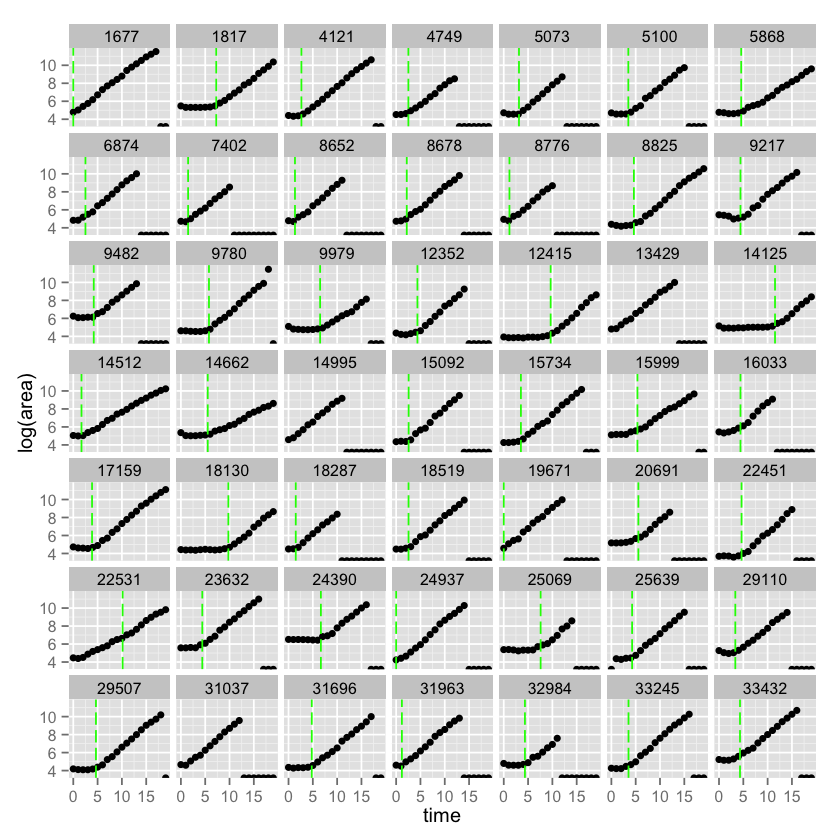

In [6]:
#Create function to extract statistics from piecewise regression on growth curves and test it on subset of data
lag_estimate = function(row) {
    x = 0:length(row)
    not_zero = which(row!=0)
    x = x[not_zero]
    y = row[not_zero]
    
    piece_model= try(segmented(lm(log(y)~x),seg.Z=~x,k=20,psi=3),silent=T)
        if (class(piece_model)[1]=="segmented") {
            reg_mod = lm(log(y)~x)
            mod_compare = AIC(reg_mod,piece_model,k=8)
                if (mod_compare$AIC[1]<mod_compare$AIC[2]){
                    lag = 0
                    conf_int = confint(piece_model)
                    conf_int$x = NA
                }
                else {
                   lag = piece_model$psi[2]
                   conf_int = confint(piece_model)

                    
                }
                    
            
            
            growth_x = subset(x,x>lag)
            growth_y = subset(y,x>lag)
            n=length(growth_x)
    
            model = lm(log(growth_y)~growth_x)
    
            slope = cov(growth_x,log(growth_y))/var(growth_x)
            intercept = mean(log(growth_y))-mean(growth_x)*slope
            predicted = growth_x*slope+intercept
    
            SS_total = sum((log(growth_y)-mean(log(growth_y)))^2)
            SS_resid = sum((log(growth_y)-predicted)^2)
            SS_exp = sum((mean(log(growth_y))-predicted)^2)
            r_squared = 1-(SS_resid/SS_total)
            foldx = max(y)/min(y)
            std_err = sqrt(SS_resid/(n-2))/sqrt(sum((growth_x-mean(growth_x))^2))

            if (n>3){
                ci_up = slope+(qt(0.975,n-2)*std_err)
                ci_low = slope-(qt(0.975,n-2)*std_err)
                return(c(lag,conf_int$x[2],conf_int$x[3],slope,ci_up,ci_low,r_squared,foldx))
            }
            else {
                return(c(NA,NA,NA,NA,NA,NA,NA,NA))
            }
          }
        else {
            return(c(NA,NA,NA,NA,NA,NA,NA,NA))
        }
}
head(rand_hs)
test = apply(rand_hs[,1:max_t],1,lag_estimate)
test = as.data.frame(t(test))
colnames(test)=c('lag','lag_upper','lag_lower','new_rate','rate_lower','rate_upper','new_r_sq','new_foldx')
head(test)


plot_df = rand_hs
plot_df$lag = test$lag
rand_melt = melt(plot_df,id = c("index","lag"),value.name="area")
colnames(rand_melt) = c("index","lag","time","area")
rand_melt$time = as.numeric(rand_melt$time)-1
head(rand_melt)

growth_plots = ggplot(rand_melt,aes(x = time,y=log(area)))+
    geom_point()+
    geom_vline(aes(xintercept=lag),colour="green", linetype = "longdash")+
    facet_wrap(~index)

growth_plots


In [7]:
#Use segmented package to estimate lag times after heat shock
areas = hs[,(dim(hs)[2]-(max_t)):(dim(hs)[2]-1)]

head(areas)
    

lags = apply(areas,1,lag_estimate)
lags = as.data.frame(t(lags))
colnames(lags)=c('lag','lag_upper','lag_lower','new_rate','rate_lower','rate_upper','new_r_sq','new_foldx')
hs = cbind(hs,lags)
head(hs)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742
15,327,293,286,301,335,393,546,836,1193,1967,3285,5052,8362,12998,19218,28974,0,0,0,0
29,108,102,104,101,100,118,147,276,456,777,1165,2071,3295,0,0,0,0,0,0,0
33,150,138,161,232,331,480,831,2006,3019,4902,0,0,0,0,0,0,0,0,0,0
36,474,399,402,325,315,273,288,321,366,452,913,983,2012,3368,3845,5699,7057,8524,11465,14761
47,122,115,117,113,120,166,272,385,619,1080,1574,2403,3266,4674,6818,10245,15091,21806,29372,41944


,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,new_foldx,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx
1,CH,5,0.4098149,0.940394,193.0244,6.584779,1,20,140909,828.6925,1,742.2074,341.7439,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742,193.0244,3.236507,2.491,3.982,0.3431464,0.369687,0.3166059,0.9821193,193.0244
15,CH,5,0.4602265,0.9986975,101.3077,5.047883,1,16,140909,828.6925,0,1515.474,639.7197,327,293,286,301,335,393,546,836,1193,1967,3285,5052,8362,12998,19218,28974,0,0,0,0,101.3077,4.737477,4.355,5.12,0.4437741,0.4574179,0.4301303,0.9983403,101.3077
29,CH,5,0.4927077,0.9958329,32.95,5.074305,1,13,140909,1013.204,0,2515.125,804.8921,108,102,104,101,100,118,147,276,456,777,1165,2071,3295,0,0,0,0,0,0,0,32.95,5.25308,4.948,5.558,0.5106408,0.5378122,0.4834693,0.9978622,32.95
33,CH,5,0.508284,0.9831733,35.52174,2.239006,1,10,140909,877.9347,0,816.2294,51.00131,150,138,161,232,331,480,831,2006,3019,4902,0,0,0,0,0,0,0,0,0,0,35.52174,3.445674,2.353,4.538,0.5678387,0.6582084,0.4774689,0.987028,35.52174
36,CH,5,0.4113621,0.9790572,54.0696,8.744158,1,20,140909,1161.928,0,850.696,1790.549,474,399,402,325,315,273,288,321,366,452,913,983,2012,3368,3845,5699,7057,8524,11465,14761,54.0696,6.48423,5.692,7.277,0.3419637,0.3748564,0.309071,0.9794237,54.0696
47,CH,5,0.4385406,0.9974115,371.1858,4.196736,1,20,140909,877.9347,0,1663.269,281.8557,122,115,117,113,120,166,272,385,619,1080,1574,2403,3266,4674,6818,10245,15091,21806,29372,41944,371.1858,3.636352,3.071,4.202,0.3953054,0.4069193,0.3836915,0.9973799,371.1858


In [8]:
lags = as.data.frame(t(lags))
colnames(lags)=c('lag','lag_upper','lag_lower','new_rate','rate_lower','rate_upper','new_r_sq','new_foldx')
hs = cbind(hs,lags)
head(hs)

ERROR: Error in data.frame(..., check.names = FALSE): arguments imply differing number of rows: 33836, 8


,treatment,strain,rate,r,foldx,lag,rate_first,rate_last,date,dist,cenfield,x,y,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,new_foldx,lag,lag_upper,lag_lower,new_rate,rate_lower,rate_upper,new_r_sq,new_foldx
1,CH,5,0.4098149,0.940394,193.0244,6.584779,1,20,140909,828.6925,1,742.2074,341.7439,302,205,145,123,158,134,189,436,550,1351,1227,1688,2164,3608,4245,6029,7080,10728,16624,23742,193.0244,3.236507,2.491,3.982,0.3431464,0.369687,0.3166059,0.9821193,193.0244
15,CH,5,0.4602265,0.9986975,101.3077,5.047883,1,16,140909,828.6925,0,1515.474,639.7197,327,293,286,301,335,393,546,836,1193,1967,3285,5052,8362,12998,19218,28974,0,0,0,0,101.3077,4.737477,4.355,5.12,0.4437741,0.4574179,0.4301303,0.9983403,101.3077
29,CH,5,0.4927077,0.9958329,32.95,5.074305,1,13,140909,1013.204,0,2515.125,804.8921,108,102,104,101,100,118,147,276,456,777,1165,2071,3295,0,0,0,0,0,0,0,32.95,5.25308,4.948,5.558,0.5106408,0.5378122,0.4834693,0.9978622,32.95
33,CH,5,0.508284,0.9831733,35.52174,2.239006,1,10,140909,877.9347,0,816.2294,51.00131,150,138,161,232,331,480,831,2006,3019,4902,0,0,0,0,0,0,0,0,0,0,35.52174,3.445674,2.353,4.538,0.5678387,0.6582084,0.4774689,0.987028,35.52174
36,CH,5,0.4113621,0.9790572,54.0696,8.744158,1,20,140909,1161.928,0,850.696,1790.549,474,399,402,325,315,273,288,321,366,452,913,983,2012,3368,3845,5699,7057,8524,11465,14761,54.0696,6.48423,5.692,7.277,0.3419637,0.3748564,0.309071,0.9794237,54.0696
47,CH,5,0.4385406,0.9974115,371.1858,4.196736,1,20,140909,877.9347,0,1663.269,281.8557,122,115,117,113,120,166,272,385,619,1080,1574,2403,3266,4674,6818,10245,15091,21806,29372,41944,371.1858,3.636352,3.071,4.202,0.3953054,0.4069193,0.3836915,0.9973799,371.1858


In [9]:
dim(hs)
hs = subset(hs,!is.na(hs$lag)) #removes observations where lag was not computed
dim(hs)
hs = subset(hs,hs$new_r_sq > 0.9) #removes observations with poor fit after estimated breakpoint
dim(hs)
hs = subset(hs,hs$new_rate > 0.2) #removes observations with low growth rate after breakpoint (indicating a plateau in area)
dim(hs)
hs = subset(hs,(hs$lag_upper-hs$lag_lower)<3) #remove observations with poor confidence on breakpoint estimate
dim(hs)

[1] 33836    42

[1] 32807    42

[1] 30771    42

[1] 30680    42

[1] 27761    42

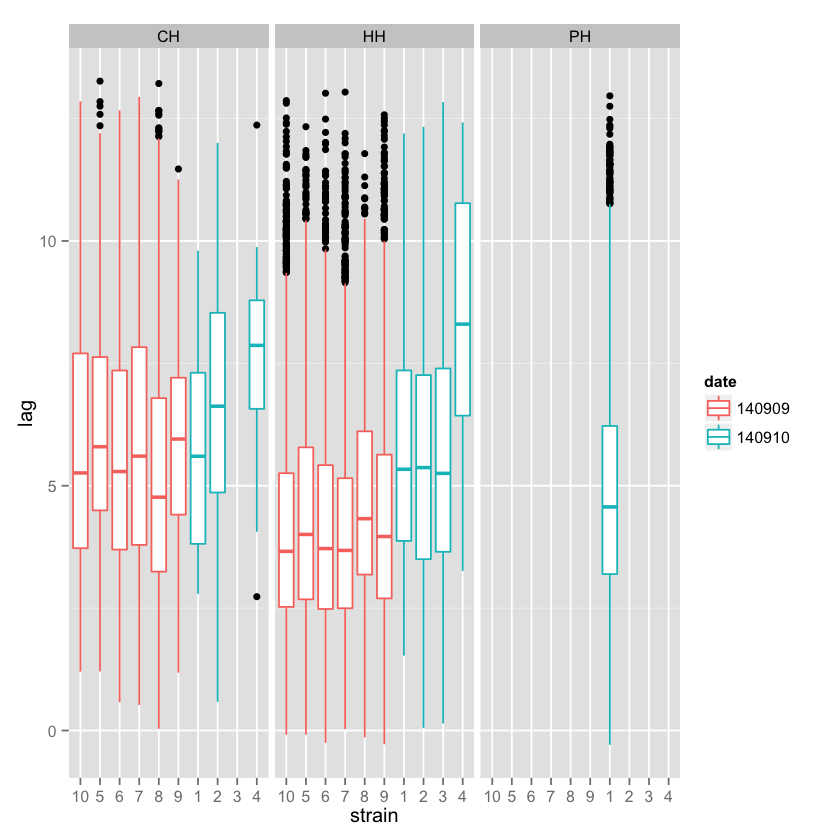

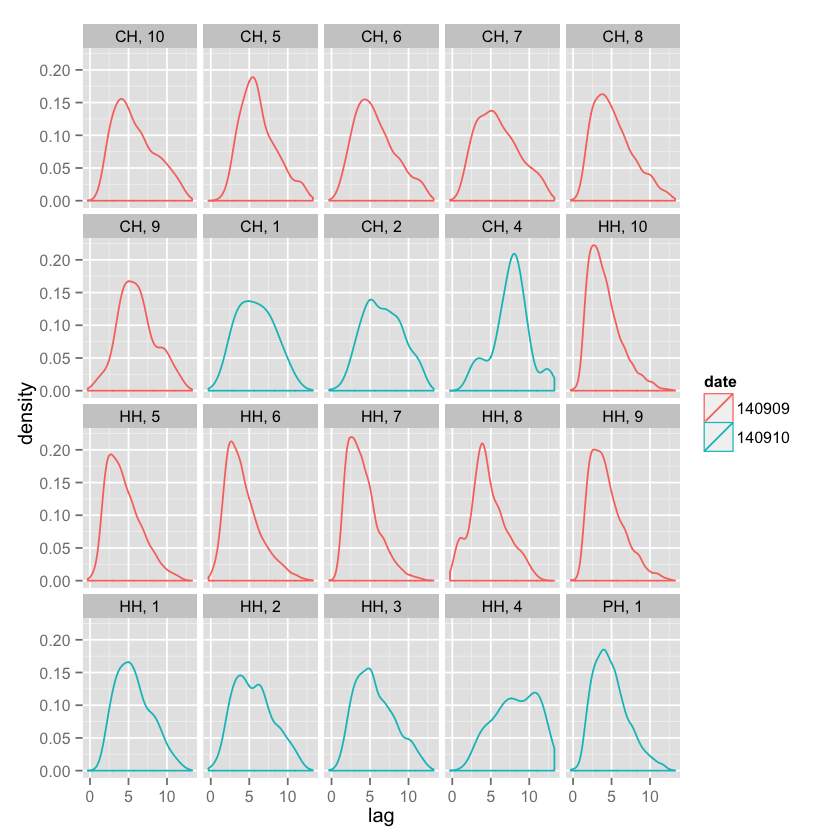

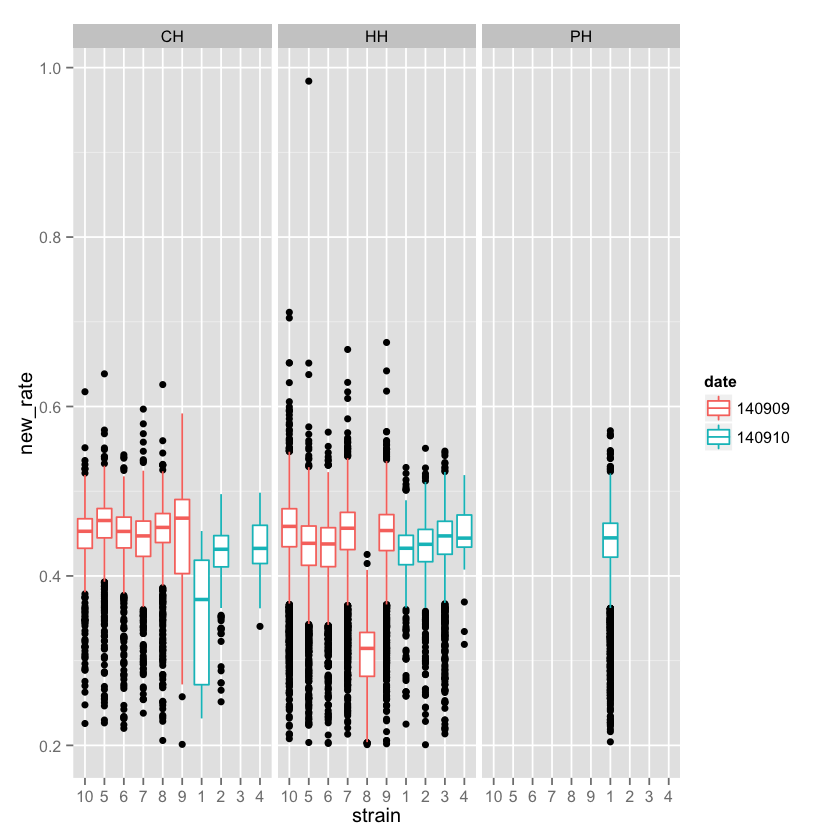

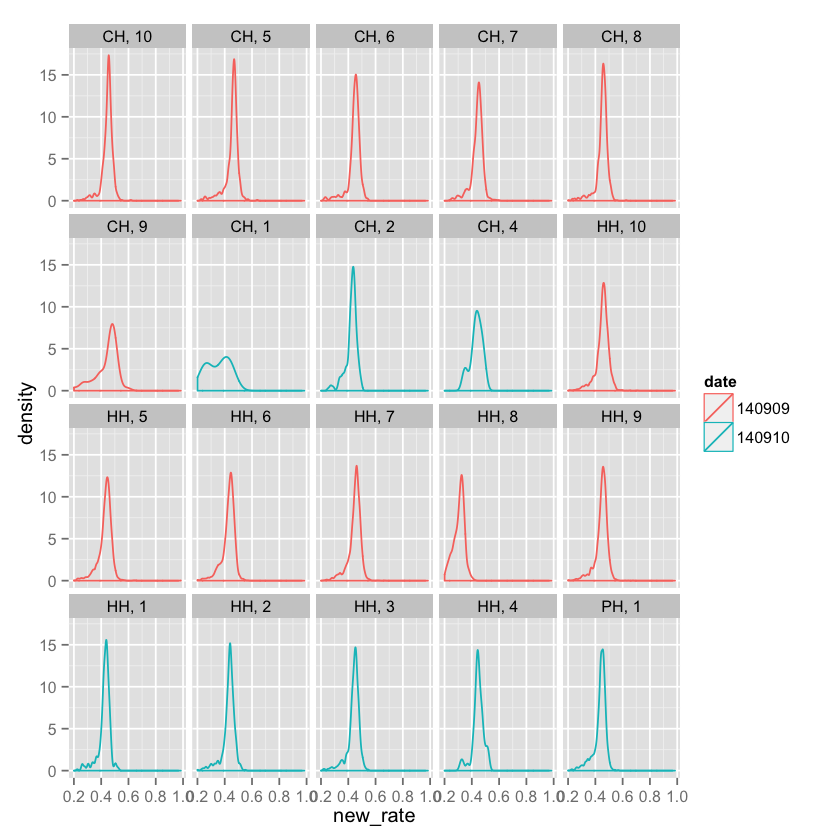

In [11]:
lag_plot1 = ggplot(hs,aes(x=strain,y=lag,color=date))+
    geom_boxplot()+
    facet_wrap(~treatment)

lag_plot2 = ggplot(hs,aes(x=lag,color=date))+
    geom_density()+
    facet_wrap(~treatment*strain)

lag_plot1
lag_plot2

rate_plot1 = ggplot(hs,aes(x=strain,y=new_rate,color=date))+
    geom_boxplot()+
    facet_wrap(~treatment)
rate_plot2 = ggplot(hs,aes(x=new_rate,color=date))+
    geom_density()+
    facet_wrap(~treatment*strain)

rate_plot1 
rate_plot2

,treatment,strain,N,mean_lag,mean_rate,var_lag,var_rate
1,CH,10,698,5.811798,0.4457608,7.199862,0.001690029
2,CH,5,641,6.204439,0.4542181,5.524527,0.002399311
3,CH,6,699,5.683348,0.4441898,6.989071,0.002149139
4,CH,7,754,5.971399,0.4391894,7.496939,0.002010032
5,CH,8,1144,5.225026,0.4497779,6.626953,0.001973111
6,CH,9,46,6.108512,0.4422737,5.711489,0.006460792
7,CH,1,10,5.818061,0.3503236,5.297214,0.0069845
8,CH,2,216,6.663223,0.4230338,6.391669,0.001787042
9,CH,4,14,7.59179,0.4330337,5.743722,0.001959993
10,HH,10,4167,4.114495,0.4521363,4.481877,0.00230761



	Wilcoxon rank sum test

data:  C$mean_lag and H$mean_lag
W = 78, p-value = 0.005672
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test

data:  C$mean_rate and H$mean_rate
W = 52, p-value = 0.6038
alternative hypothesis: true location shift is not equal to 0


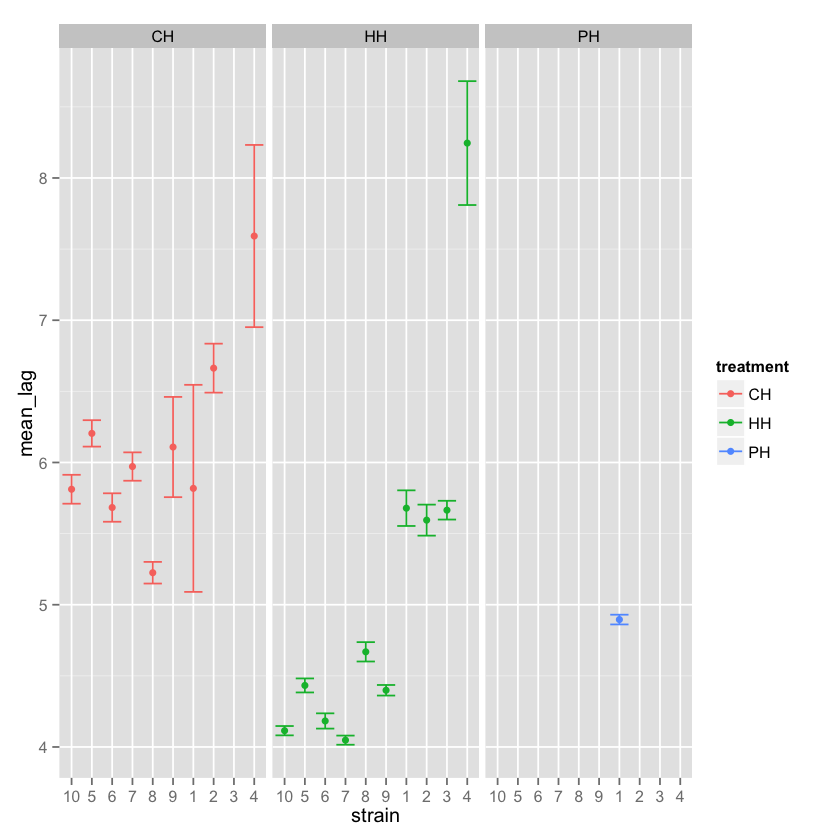

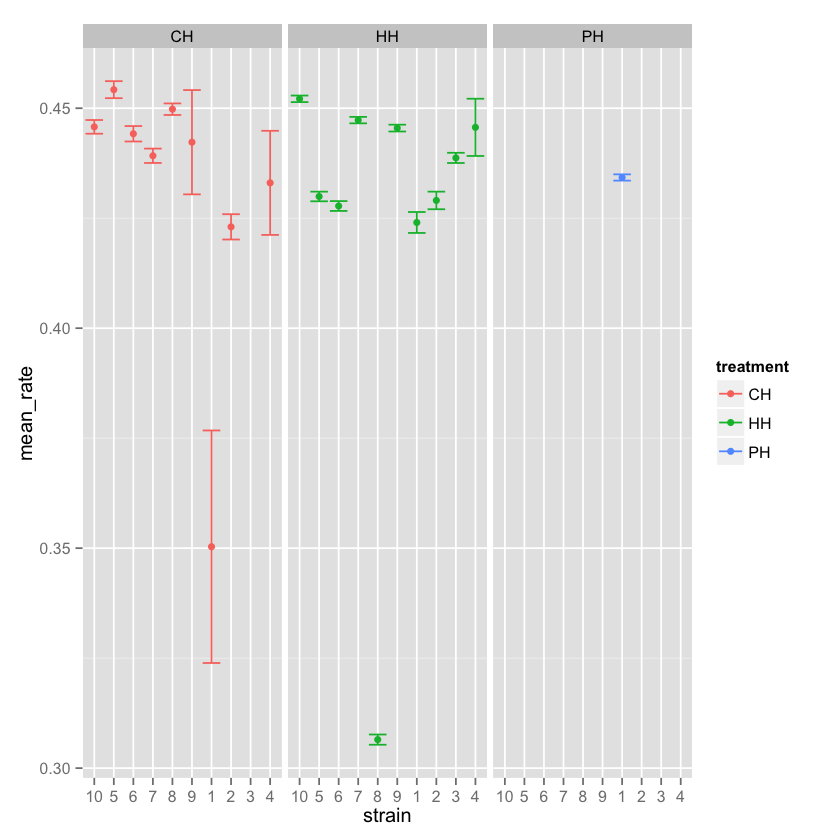

In [12]:
data = ddply(hs,~treatment*strain,N=length(lag),summarise,mean_lag=mean(lag),mean_rate=mean(new_rate),var_lag=var(lag),var_rate=var(new_rate))
data

C = subset(data,data$treatment=="CH")
H = subset(data,data$treatment=="HH")

lag_lims = aes(ymax = mean_lag+(sqrt(var_lag)/sqrt(N)) , ymin= mean_lag-(sqrt(var_lag)/sqrt(N)))
rate_lims = aes(ymax = mean_rate+(sqrt(var_rate)/sqrt(N)) , ymin= mean_rate-(sqrt(var_rate)/sqrt(N)))

lag_means = ggplot(data,aes(x=strain,y=mean_lag,colour=treatment))+
    geom_point()+
    geom_errorbar(lag_lims)+
    facet_wrap(~treatment)

rate_means = ggplot(data,aes(x=strain,y=mean_rate,colour=treatment))+
    geom_point()+
    geom_errorbar(rate_lims)+
    facet_wrap(~treatment)

lag_test = wilcox.test(C$mean_lag,H$mean_lag)
rate_test=wilcox.test(C$mean_rate,H$mean_rate)

lag_test
rate_test
lag_means
rate_means